In [58]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
table = pd.read_csv("/Users/ilmasheriff/tweetdata",encoding= 'unicode_escape')

In [60]:
table.shape

(1010508, 5)

In [61]:
table.columns

Index(['Unnamed: 0', 'Data', 'Subjectivity', 'Polarity', 'Score'], dtype='object')

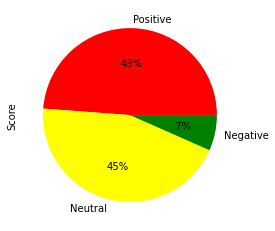

In [62]:
table.Score.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["red", "yellow", "green"])

In [63]:
table.head()

,Unnamed: 0,Data,Subjectivity,Polarity,Score
0,0,cnsnews benshapiro Can COVID19Vaccine end the ...,0.0,0.0,Neutral
1,1,IntrepidWarrior realDonaldTrump Can COVID19Vac...,0.0,0.0,Neutral
2,2,edyong209 HelenBranswell Can COVID19Vaccine en...,0.0,0.0,Neutral
3,3,AdamTexDavis Can COVID19Vaccine end the pandemic,0.0,0.0,Neutral
4,4,HegKong Can COVID19Vaccine end the pandemic,0.0,0.0,Neutral


In [64]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a > 0:
        return "1"
    else:
        return "0"

In [65]:
table['Score'] = table['Polarity'].apply(getTextAnalysis)

In [66]:
table[table['Score'] == '0'].shape

(517261, 5)

In [67]:
table[table['Score'] == '1'].shape

(493247, 5)

In [70]:
table.shape

(1010508, 5)

In [68]:
table.head(10)

,Unnamed: 0,Data,Subjectivity,Polarity,Score
0,0,cnsnews benshapiro Can COVID19Vaccine end the ...,0.0,0.0,0
1,1,IntrepidWarrior realDonaldTrump Can COVID19Vac...,0.0,0.0,0
2,2,edyong209 HelenBranswell Can COVID19Vaccine en...,0.0,0.0,0
3,3,AdamTexDavis Can COVID19Vaccine end the pandemic,0.0,0.0,0
4,4,HegKong Can COVID19Vaccine end the pandemic,0.0,0.0,0
5,5,DrTessaT HegKong Can COVID19Vaccine end the pa...,0.0,0.0,0
6,6,FarahKhanAli Can COVID19Vaccine end the pandemic,0.0,0.0,0
7,7,putaYINGonit CMSGov Can COVID19Vaccine end the...,0.0,0.0,0
8,8,C19Vaccine kaimrcksa CEPIvaccines KSAMedResear...,0.0,0.0,0
9,9,Moderna Prepares to Launch COVID19 Vaccine Can...,0.0,0.0,0


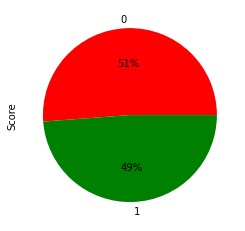

In [69]:
table.Score.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["red","green"])

In [71]:
features = table.iloc[:, 1].values
labels = table.iloc[:, 4].values

In [72]:
features

array(['cnsnews benshapiro Can COVID19Vaccine end the pandemic',
       'IntrepidWarrior realDonaldTrump Can COVID19Vaccine end the pandemic',
       'edyong209 HelenBranswell Can COVID19Vaccine end the pandemic',
       ...,
       'Bottlenecks at congested hub airports will likely be a critical point in the COVID19vaccine distribution',
       'Bottlenecks at congested hub airports will likely be a critical point in the COVID19vaccine distribution',
       'RT moneycontrolcom OxfordAstraZeneca completes its experimental COVID19 vaccine trials and BMC will soon start the third phase of its c'],
      dtype=object)

In [73]:
labels

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [74]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [75]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

In [25]:
predictions = text_classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[13008     0]
 [    2 14990]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13008
           2       1.00      1.00      1.00     14992

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000

0.9999285714285714


In [32]:
from sklearn.model_selection import cross_val_score

rfc_cv_score = cross_val_score(text_classifier, processed_features, labels, cv=5, scoring='roc_auc')

In [34]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')

=== Confusion Matrix ===
[[13008     0]
 [    2 14990]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13008
           2       1.00      1.00      1.00     14992

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000



=== All AUC Scores ===
[0.99999082 1.         1.         1.         1.        ]


